Fetch Data

In [221]:
import pandas as pd
from pycaret.time_series import *
import matplotlib.pyplot as plt
from fetch_data import fetch_data

In [222]:
df = fetch_data()

[*********************100%***********************]  30 of 30 completed


In [223]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

BTC-USD Prophet Model

In [224]:
btc = df.loc[:,'BTC-USD']
btc.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 365 entries, 2024-05-01 to 2025-04-30
Series name: BTC-USD
Non-Null Count  Dtype  
--------------  -----  
365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [236]:
# Set up PyCaret environment
s = setup(data=btc, 
          target = 'BTC-USD',
          #transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,BTC-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [74]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.6522,0.5887,136.6378,166.7971,0.0529,0.0522,0.1251,0.1033
ets,ETS,1.0164,0.8720,212.6287,246.5809,0.0836,0.0785,-0.8882,0.1067
arima,ARIMA,1.1009,0.9622,230.3140,272.0233,0.0916,0.0852,-1.2898,0.1500
theta,Theta Forecaster,1.2312,1.0335,257.4473,291.9464,0.1052,0.0977,-1.7004,0.0700
naive,Naive Forecaster,1.2483,1.0399,261.0802,293.7721,0.1068,0.0991,-1.7372,1.5900
auto_arima,Auto ARIMA,1.2483,1.0399,261.0802,293.7721,0.1068,0.0991,-1.7372,0.9933
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.3970,1.1522,292.0257,325.3238,0.1202,0.1104,-2.4133,0.9633
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.4459,1.1712,302.5953,331.0876,0.1219,0.1122,-2.4031,0.5967
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.4592,1.2201,305.0520,344.3882,0.1297,0.1183,-3.2271,0.4933
stlf,STLF,1.4798,1.2344,309.6086,348.8524,0.1270,0.1162,-2.8640,0.0633


In [237]:
prophet = create_model('prophet')


In [238]:
tuned_prophet = tune_model(prophet)


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-31,1.5436,1.2940,5710.4340,6368.7755,0.0582,0.0562,-1.5263
1,2025-01-30,1.8720,1.7535,7029.5063,8687.0204,0.0769,0.0724,-2.3760
2,2025-03-01,2.3760,1.8891,8969.4143,9472.8933,0.1069,0.1008,-8.0960
Mean,NaT,1.9305,1.6455,7236.4515,8176.2297,0.0807,0.0765,-3.9994
SD,NaT,0.3423,0.2547,1338.4961,1317.7170,0.0200,0.0185,2.9174


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.2s finished


In [239]:
# Predictions
final_prophet = finalize_model(tuned_prophet)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
prophet_predictions = predict_model(final_prophet)
#arima_predictions = predict_model(tuned_arima, fh=30)

In [80]:
import plotly.io as pio

In [240]:
plot_model(final_prophet, plot='forecast', return_fig=True)

In [27]:
#Plot prophet model forecast
fig = plot_model(final_prophet, plot='forecast', return_fig=True)

# Save it as an HTML file
pio.write_html(fig, file='forecast_chart.html', auto_open=False)



BTC-USD Exponential Smoothing Model

In [247]:
# Set up PyCaret environment
s = setup(data=btc, 
          target = 'BTC-USD',
          #transform_target='log',
          fh=1,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')

exp = create_model('exp_smooth')
tuned_exp = tune_model(exp)
final_exp = finalize_model(tuned_exp)
exp_prediction = predict_model(final_exp)

,Description,Value
0,session_id,123
1,Target,BTC-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(364, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2025-04-26,0.0598,0.0452,227.3446,227.3446,0.0024,0.0024
1,2025-04-27,0.2224,0.1685,849.0979,849.0979,0.0089,0.0090
2,2025-04-28,0.2876,0.2181,1100.7263,1100.7263,0.0117,0.0116
Mean,NaT,0.1899,0.1440,725.7230,725.7230,0.0077,0.0077
SD,NaT,0.0958,0.0727,367.0740,367.0740,0.0039,0.0039


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2025-04-26,0.0593,0.0449,225.5448,225.5448,0.0024,0.0024
1,2025-04-27,0.3834,0.2904,1463.3192,1463.3192,0.0154,0.0155
2,2025-04-28,0.0838,0.0635,320.7115,320.7115,0.0034,0.0034
Mean,NaT,0.1755,0.1330,669.8585,669.8585,0.0071,0.0071
SD,NaT,0.1473,0.1116,562.4050,562.4050,0.0059,0.0060


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.2s finished


In [248]:
plot_model(final_exp, plot='forecast')

In [249]:
#Plot prophet model forecast
fig = plot_model(final_exp, plot='forecast', return_fig=True)

# Save it as an HTML file
pio.write_html(fig, file='BTC_EXP_1.html', auto_open=False)

BTC-USD ARIMA Model

In [241]:
arima = create_model('arima')

In [242]:
tuned_arima = tune_model(arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-31,1.8012,1.5835,6663.0285,7793.6827,0.0652,0.0682,-2.7832
1,2025-01-30,2.3759,2.0217,8921.9082,10015.9759,0.0965,0.0907,-3.4879
2,2025-03-01,0.7163,0.6697,2704.0493,3358.3243,0.0320,0.0317,-0.1432
Mean,NaT,1.6311,1.4250,6096.3287,7055.9943,0.0645,0.0635,-2.1381
SD,NaT,0.6881,0.5632,2569.8643,2767.5765,0.0263,0.0243,1.4397


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.4s finished


In [243]:
final_arima = finalize_model(tuned_arima)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
arima_predictions = predict_model(final_arima)

In [244]:
#Plot prophet model forecast
plot_model(final_arima, plot='forecast')

BNB-USD ARIMA Model

In [172]:
bnb = df.loc[:,'BNB-USD']
# Set up PyCaret environment
s = setup(data=bnb, 
          target = 'BNB-USD',
          transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,BNB-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [40]:
arima = create_model('arima')
tuned_arima = tune_model(arima)
final_arima = finalize_model(tuned_arima)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
arima_predictions = predict_model(final_arima)
#Plot prophet model forecast
plot_model(final_arima, plot='forecast')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:57:33
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-29,1.2888,1.1544,42.9714,49.6914,0.0623,0.0598,-9.8557
1,2025-01-28,1.0514,1.0765,33.0733,44.2206,0.0545,0.0520,-0.6437
2,2025-02-27,0.7666,0.7247,25.3279,31.3005,0.0421,0.0423,-0.3252
Mean,NaT,1.0356,0.9852,33.7909,41.7375,0.0530,0.0513,-3.6082
SD,NaT,0.2135,0.1870,7.2208,7.7106,0.0083,0.0072,4.4195


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-29,0.3541,0.3469,11.8048,14.9315,0.0169,0.0170,0.0198
1,2025-01-28,0.9938,1.0189,31.2594,41.8539,0.0514,0.0493,-0.4725
2,2025-02-27,0.6840,0.6329,22.6008,27.3374,0.0382,0.0377,-0.0109
Mean,NaT,0.6773,0.6662,21.8883,28.0409,0.0355,0.0347,-0.1545
SD,NaT,0.2612,0.2753,7.9582,11.0023,0.0142,0.0134,0.2252


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.2s finished


BNB-USD Prophet Model - Using This one for GUI

In [259]:
bnb = df.loc[:,'BNB-USD']
# Set up PyCaret environment
s = setup(data=bnb, 
          target = 'BNB-USD',
          transform_target='log',
          fh=7,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')
prophet = create_model('prophet')
tuned_prophet = tune_model(prophet)
# Predictions
bnb_prophet = finalize_model(tuned_prophet)
prophet_predictions = predict_model(bnb_prophet)
#Plot prophet model forecast


,Description,Value
0,session_id,123
1,Target,BNB-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(358, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2025-04-02,0.4597,0.4183,15.1715,17.9343,0.0269,0.0265,0.0941
1,2025-04-09,0.2798,0.2379,9.2443,10.1831,0.0158,0.0159,-2.0438
2,2025-04-16,0.7088,0.6142,23.1756,26.0799,0.0384,0.0394,-6.2309
Mean,NaT,0.4828,0.4235,15.8638,18.0658,0.0270,0.0273,-2.7269
SD,NaT,0.1759,0.1537,5.7085,6.4905,0.0093,0.0096,2.6270


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2025-04-02,0.4740,0.4939,15.6437,21.1762,0.0280,0.0273,-0.2630
1,2025-04-09,0.1191,0.1158,3.9328,4.9564,0.0067,0.0067,0.2789
2,2025-04-16,0.5200,0.4877,17.0021,20.7057,0.0281,0.0287,-3.5579
Mean,NaT,0.3710,0.3658,12.1929,15.6128,0.0209,0.0209,-1.1807
SD,NaT,0.1791,0.1768,5.8670,7.5376,0.0101,0.0101,1.6954


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.7s finished


In [255]:
bnb = plot_model(bnb_prophet,plot = 'forecast', return_fig=True)
# Save it as an HTML file
pio.write_html(bnb, file='BNB_Prophet_7.html', auto_open=False)

In [254]:
plot_model(bnb_prophet,plot = 'forecast')

In [196]:
forecast_df = predict_model(bnb_prophet)
# Reset the index to get the datetime
forecast_df = forecast_df.reset_index()

# Rename the index column to 'ds' for clarity (optional)
forecast_df.rename(columns={'index': 'ds'}, inplace=True)
forecast_df['y_pred_ma'] = forecast_df['y_pred'].rolling(window=5).mean()


In [197]:
forecast_df['signal_ma'] = 0
for i in range(1, len(forecast_df)):
    if forecast_df['y_pred_ma'].iloc[i] > forecast_df['y_pred_ma'].iloc[i-1] + 20:
        forecast_df.loc[i, 'signal_ma'] = 1
    elif forecast_df['y_pred_ma'].iloc[i] < forecast_df['y_pred_ma'].iloc[i-1] - 20:
        forecast_df.loc[i, 'signal_ma'] = -1


In [195]:
print(forecast_df.columns)

Index(['y_pred', 'y_pred_ma', 'signal_ma'], dtype='object')


In [208]:
from candlestick import fetch_all_data
historical = fetch_all_data()
historical.rename(columns={'index': 'ds','Clost_BTC-USD':'y'}, inplace=True)


[*********************100%***********************]  30 of 30 completed


In [218]:
historical.rename(columns={'Date': 'ds','Close_BTC-USD':'y'}, inplace=True)


In [219]:
historical.head()

,ds,Close_AAVE-USD,Close_ADA-USD,Close_ALGO-USD,Close_ATOM-USD,Close_AVAX-USD,Close_BCH-USD,Close_BNB-USD,y,Close_CHR-USD,...,Volume_SOL-USD,Volume_THETA-USD,Volume_TRX-USD,Volume_UNI-USD,Volume_USDT-USD,Volume_VET-USD,Volume_WIF-USD,Volume_XLM-USD,Volume_XMR-USD,Volume_XRP-USD
0,2024-05-01,83.748108,0.449866,0.180666,8.742611,33.288101,424.038635,561.408203,58254.011719,0.268329,...,4136407963,67062567,482118834,32.0,76859530069,77079462,539683830,99567176,44685650,1720060134
1,2024-05-02,84.980095,0.458282,0.181256,8.651612,33.612564,429.969849,560.526733,59123.433594,0.270306,...,3380078368,49140176,352230934,32.0,54769809487,47564282,431302208,74766755,47242005,1118497654
2,2024-05-03,88.814995,0.467544,0.191979,8.768824,35.584896,453.345551,587.010437,62889.835938,0.282321,...,3216962298,39098980,275034834,34.0,53871028495,56741257,444766260,62383004,52444310,1138445190
3,2024-05-04,89.053757,0.463577,0.192794,8.694795,37.361832,463.508820,585.846558,63891.472656,0.277544,...,3050187811,33466740,224837130,35.0,39527945715,44470807,546978472,49329923,59402585,686389982
4,2024-05-05,90.078110,0.458334,0.196579,9.336216,37.401939,469.264282,592.140381,64031.132812,0.276074,...,2034794725,35391257,196753191,35.0,36224596673,39574801,388774584,44733799,68420933,535784827


In [220]:
import plotly.graph_objects as go

forecast_df = predict_model(bnb_prophet)
# Reset the index and add moving average and signals
forecast_df = forecast_df.reset_index()



# Rename columns for clarity
forecast_df.rename(columns={'index': 'ds'}, inplace=True)
forecast_df['y_pred_ma'] = forecast_df['y_pred'].rolling(window=5).mean()
forecast_df['signal_ma'] = 0
# Convert 'ds' column to datetime to avoid the Period type issue
# Convert 'ds' column to timestamp from Period type
forecast_df['ds'] = forecast_df['ds'].dt.to_timestamp()

# Add buy and sell signals based on moving average
for i in range(1, len(forecast_df)):
    if forecast_df['y_pred_ma'].iloc[i] > forecast_df['y_pred_ma'].iloc[i-1] + 20:
        forecast_df.loc[i, 'signal_ma'] = 1
    elif forecast_df['y_pred_ma'].iloc[i] < forecast_df['y_pred_ma'].iloc[i-1] - 20:
        forecast_df.loc[i, 'signal_ma'] = -1

# Create the figure
fig = go.Figure()

# Plot actual price (historical data)
if 'y' in forecast_df.columns:
    fig.add_trace(go.Scatter(
        x=forecast_df['ds'],
        y=forecast_df['y'],
        mode='lines',
        name='Historical Price',
        line=dict(color='gray')
    ))
fig.add_trace(go.Scatter(
    x=historical['ds'],
    y=historical['y'],
    mode='lines',
    name='Historical Price',
    line=dict(color='black')
))
# Plot predicted price (forecast)
fig.add_trace(go.Scatter(
    x=forecast_df['ds'],
    y=forecast_df['y_pred'],
    mode='lines',
    name='Predicted Price (y_pred)',
    line=dict(color='blue')
))

# Plot moving average of forecasted price
fig.add_trace(go.Scatter(
    x=forecast_df['ds'],
    y=forecast_df['y_pred_ma'],
    mode='lines',
    name='Forecast MA (5-day)',
    line=dict(color='orange', dash='dash')
))

# Plot Buy signals based on moving average
buy_signals_ma = forecast_df[forecast_df['signal_ma'] == 1]
fig.add_trace(go.Scatter(
    x=buy_signals_ma['ds'],
    y=buy_signals_ma['y_pred_ma'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signal (MA)'
))

# Plot Sell signals based on moving average
sell_signals_ma = forecast_df[forecast_df['signal_ma'] == -1]
fig.add_trace(go.Scatter(
    x=sell_signals_ma['ds'],
    y=sell_signals_ma['y_pred_ma'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signal (MA)'
))

# Update layout and display the plot
fig.update_layout(
    title='BNB-USD Forecast with Moving Average and Buy/Sell Signals',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_white',
    hovermode='x unified'
)

fig.show()


In [284]:
bnb = df.loc[:,'BNB-USD']
# Set up PyCaret environment
s = setup(data=bnb, 
          target = 'BNB-USD',
          transform_target='log',
          fh=1,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')
exp = create_model('exp_smooth')
tuned_exp = tune_model(exp)
final_exp = finalize_model(tuned_exp)
exp_predictions = predict_model(final_exp)
plot_model(final_exp, plot='forecast')


,Description,Value
0,session_id,123
1,Target,BNB-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(364, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2025-04-26,0.0686,0.0526,2.2089,2.2089,0.0037,0.0037
1,2025-04-27,0.1021,0.0782,3.2785,3.2785,0.0054,0.0054
2,2025-04-28,0.1968,0.1508,6.3084,6.3084,0.0105,0.0104
Mean,NaT,0.1225,0.0939,3.9319,3.9319,0.0065,0.0065
SD,NaT,0.0543,0.0416,1.7362,1.7362,0.0029,0.0029


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2025-04-26,0.1333,0.1022,4.2885,4.2885,0.0071,0.0071
1,2025-04-27,0.1640,0.1257,5.2671,5.2671,0.0087,0.0087
2,2025-04-28,0.0152,0.0116,0.4862,0.4862,0.0008,0.0008
Mean,NaT,0.1041,0.0798,3.3473,3.3473,0.0055,0.0056
SD,NaT,0.0641,0.0492,2.0621,2.0621,0.0034,0.0034


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.9s finished


In [285]:
#Plot prophet model forecast
fig = plot_model(final_exp, plot='forecast', return_fig=True)

# Save it as an HTML file
pio.write_html(fig, file='BNB_EXP_1.html', auto_open=False)

WIF-USD ARIMA and Prophet Models

In [260]:
wif = df.loc[:,'WIF-USD']

In [265]:
wif = df.loc[:,'WIF-USD']
# Set up PyCaret environment
s = setup(data=wif, 
          target = 'WIF-USD',
          transform_target='log',
          fh=1,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')
arima = create_model('arima')

tuned_arima = tune_model(arima)

final_arima = finalize_model(tuned_arima)

#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
arima_predictions = predict_model(final_arima)

#Plot ARIMA model forecast
plot_model(final_arima, plot='forecast')


,Description,Value
0,session_id,123
1,Target,WIF-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(364, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2025-04-26,0.0468,0.0338,0.0139,0.0139,0.0227,0.0224
1,2025-04-27,0.1361,0.0982,0.0404,0.0404,0.0654,0.0676
2,2025-04-28,0.3078,0.2221,0.0914,0.0914,0.1518,0.1411
Mean,NaT,0.1636,0.1180,0.0486,0.0486,0.0799,0.0770
SD,NaT,0.1083,0.0781,0.0321,0.0321,0.0537,0.0489


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2025-04-26,0.0912,0.0658,0.0271,0.0271,0.0442,0.0432
1,2025-04-27,0.0188,0.0136,0.0056,0.0056,0.0090,0.0091
2,2025-04-28,0.0003,0.0002,0.0001,0.0001,0.0002,0.0002
Mean,NaT,0.0368,0.0265,0.0109,0.0109,0.0178,0.0175
SD,NaT,0.0392,0.0283,0.0117,0.0117,0.0190,0.0185


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.3s finished


In [266]:
#Plot prophet model forecast
fig = plot_model(final_arima, plot='forecast', return_fig=True)

# Save it as an HTML file
pio.write_html(fig, file='WIF_ARIMA_1.html', auto_open=False)

In [53]:
prophet = create_model('prophet')
tuned_prophet = tune_model(prophet)
final_prophet = finalize_model(tuned_prophet)
prophet_predictions = predict_model(final_prophet)
#Plot prophet model forecast
plot_model(final_prophet, plot='forecast')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,4.2297,3.3594,1.5628,1.6151,1.0487,0.6583,-26.8765
1,2025-01-29,1.4965,1.1735,0.5405,0.5485,0.8004,0.5621,-11.1651
2,2025-02-28,0.2930,0.2597,0.0997,0.1164,0.1908,0.2187,-1.8435
Mean,NaT,2.0064,1.5976,0.7343,0.7600,0.6800,0.4797,-13.2950
SD,NaT,1.6471,1.3005,0.6128,0.6299,0.3605,0.1887,10.3301


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-30,1.5518,1.2833,0.5734,0.6170,0.3933,0.3152,-3.0677
1,2025-01-29,0.7547,0.6156,0.2725,0.2877,0.4061,0.3301,-2.3474
2,2025-02-28,0.3754,0.3214,0.1278,0.1440,0.2440,0.2890,-3.3551
Mean,NaT,0.8940,0.7401,0.3246,0.3496,0.3478,0.3114,-2.9234
SD,NaT,0.4903,0.4024,0.1856,0.1980,0.0736,0.0170,0.4238


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.6s finished


ETH Forecast with ARIMA (not working), Exponential Smoothing (best), and Prophet

In [267]:
eth = df.loc[:,'ETH-USD']

In [281]:
eth = df.loc[:,'ETH-USD']
# Set up PyCaret environment
s = setup(data=eth, 
          target = 'ETH-USD',
          #transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')

arima_1 = create_model('arima')


,Description,Value
0,session_id,123
1,Target,ETH-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-31,0.6248,0.6184,133.0295,178.4661,0.0388,0.0400,-0.3543
1,2025-01-30,2.1903,1.7721,457.1580,498.8720,0.1780,0.1602,-4.1251
2,2025-03-01,0.5114,0.4591,107.7391,129.7990,0.0531,0.0537,0.2676
Mean,NaT,1.1088,0.9498,232.6422,269.0457,0.0900,0.0846,-1.4039
SD,NaT,0.7661,0.5850,159.0920,163.7217,0.0625,0.0537,1.9408


In [283]:
exp = create_model('exp_smooth')
tuned_exp = tune_model(exp)
final_exp = finalize_model(tuned_exp)
exp_predictions = predict_model(final_exp)
plot_model(final_exp, plot='forecast')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-31,0.5346,0.5136,113.8343,148.2274,0.0338,0.0339,0.0657
1,2025-01-30,2.5629,2.0252,534.9346,570.1375,0.2075,0.1849,-5.6939
2,2025-03-01,1.0302,0.8711,217.0351,246.2844,0.1115,0.1045,-1.6367
Mean,NaT,1.3759,1.1366,288.6013,321.5498,0.1176,0.1078,-2.4216
SD,NaT,0.8634,0.6450,179.2069,180.2789,0.0711,0.0617,2.4160


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-31,0.5846,0.5753,124.4678,166.0340,0.0368,0.0371,-0.1722
1,2025-01-30,2.0084,1.6608,419.1861,467.5588,0.1641,0.1482,-3.5019
2,2025-03-01,0.8645,0.7412,182.1284,209.5703,0.0933,0.0885,-0.9092
Mean,NaT,1.1525,0.9925,241.9274,281.0544,0.0981,0.0913,-1.5278
SD,NaT,0.6159,0.4774,127.5321,133.0709,0.0521,0.0454,1.4280


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.0s finished


In [279]:
#Plot prophet model forecast
fig = plot_model(final_exp, plot='forecast', return_fig=True)

# Save it as an HTML file
pio.write_html(fig, file='ETH_EXP_1.html', auto_open=False)

In [282]:
prophet = create_model('prophet')
tuned_prophet = tune_model(prophet)
final_prophet = finalize_model(tuned_prophet)
prophet_predictions = predict_model(final_prophet)
plot_model(final_prophet, plot='forecast')


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-31,3.4084,2.6734,725.7074,771.5440,0.2216,0.1967,-24.3122
1,2025-01-30,2.8315,2.2104,590.9944,622.2817,0.2285,0.2020,-6.9743
2,2025-03-01,1.3263,1.0849,279.4033,306.7483,0.1422,0.1308,-3.0903
Mean,NaT,2.5221,1.9896,532.0350,566.8580,0.1974,0.1765,-11.4590
SD,NaT,0.8777,0.6670,186.9117,193.7569,0.0392,0.0324,9.2259


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-31,3.3738,2.6402,718.3341,761.9439,0.2193,0.1950,-23.6862
1,2025-01-30,1.4367,1.1707,299.8675,329.5651,0.1165,0.1086,-1.2367
2,2025-03-01,1.0021,0.8627,211.1220,243.9258,0.1074,0.1001,-1.5865
Mean,NaT,1.9375,1.5579,409.7745,445.1450,0.1477,0.1346,-8.8365
SD,NaT,1.0309,0.7756,221.1722,226.7226,0.0507,0.0429,10.5014


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.5s finished


Forecast BTC-USD using XGBOOST

In [145]:
import xgboost
from pycaret.regression import *



Forecast BTC-USD using LSTM

In [104]:
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM
from neuralforecast.losses.pytorch import MAE
import matplotlib.pyplot as plt
from candlestick import fetch_all_data

In [146]:
df_full = fetch_data()

[*********************100%***********************]  30 of 30 completed


In [147]:
# Clean BTC-only data for LSTM
df_btc = df_full[['BTC-USD']].copy()
df_btc = df_btc.dropna()  # Drop rows with missing BTC prices

In [148]:
# Prepare for NeuralForecast
df_btc['ds'] = pd.to_datetime(df_btc.index)
df_btc['y'] = df_btc['BTC-USD']
df_btc['unique_id'] = 'BTC-USD'

In [149]:
# Only keep required columns
df_btc = df_btc[['unique_id', 'ds', 'y']]

In [150]:
# Train LSTM
lstm_model = LSTM(
    h=30,
    input_size=60,
    max_steps=500,
    loss=MAE(),
    scaler_type='standard'
)

Seed set to 1


In [151]:

nf = NeuralForecast(models=[lstm_model], freq='D')
nf.fit(df=df_btc)
forecast = nf.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 16.6 K | train
-------------------------------------------------------
215 K     Trainable params
0         Non-trainable params
215 K     Total params
0.863     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

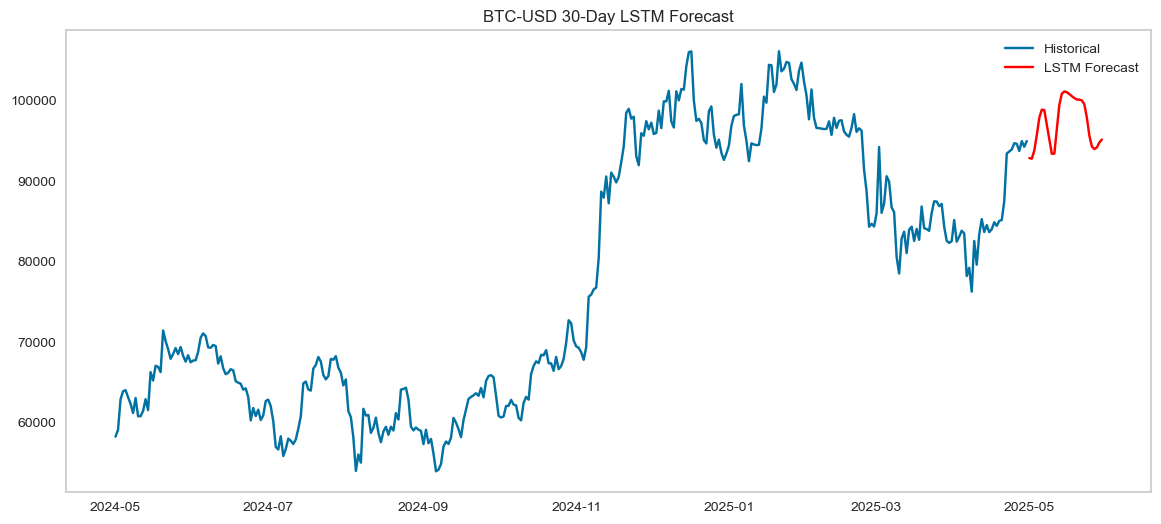

In [152]:
# 4. Plot results
plt.figure(figsize=(14, 6))
plt.plot(df_btc['ds'], df_btc['y'], label='Historical')
plt.plot(forecast['ds'], forecast['LSTM'], label='LSTM Forecast', color='red')
plt.title('BTC-USD 30-Day LSTM Forecast')
plt.legend()
plt.grid()
plt.show()

In [153]:
# Rebuild the signal column
df_btc['signal'] = 0
for i in range(1, len(df_btc)):
    if df_btc['y'].iloc[i] > df_btc['y'].iloc[i-1] + 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = 1
    elif df_btc['y'].iloc[i] < df_btc['y'].iloc[i-1] - 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = -1


In [125]:
import plotly.graph_objects as go

In [154]:
fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(
    x=df_btc['ds'],
    y=df_btc['y'],
    mode='lines',
    name='Historical BTC Price'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y = forecast['LSTM'], 
    name ='LSTM Forecast'
))
# Add Buy Signal Markers
buy_signals = df_btc[df_btc['signal'] == 1]
fig.add_trace(go.Scatter(
    x=buy_signals['ds'],
    y=buy_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='green'),
    name='Buy Signal'
))

# Add Sell Signal Markers
sell_signals = df_btc[df_btc['signal'] == -1]
fig.add_trace(go.Scatter(
    x=sell_signals['ds'],
    y=sell_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='red'),
    name='Sell Signal'
))
# Customize the layout
fig.update_layout(
    title='BTC-USD Price Forecast with LSTM',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_white'  # Optional: Use a clean template

)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()

In [ ]:
# Save it as an HTML file
pio.write_html(fig, file='btc_LSTM_30.html', auto_open=False)

In [156]:
df_full = fetch_data()
# Clean BTC-only data for LSTM
df_btc = df_full[['BTC-USD']].copy()
df_btc = df_btc.dropna()  # Drop rows with missing BTC prices
# Prepare for NeuralForecast
df_btc['ds'] = pd.to_datetime(df_btc.index)
df_btc['y'] = df_btc['BTC-USD']
df_btc['unique_id'] = 'BTC-USD'
# Only keep required columns
df_btc = df_btc[['unique_id', 'ds', 'y']]

[*********************100%***********************]  30 of 30 completed


In [ ]:
# Train LSTM
lstm_model = LSTM(
    h=1,
    input_size=60,
    max_steps=500,
    loss=MAE(),
    scaler_type='standard'
)

Seed set to 1


In [159]:
nf = NeuralForecast(models=[lstm_model], freq='D')
nf.fit(df=df_btc)
forecast = nf.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 16.6 K | train
-------------------------------------------------------
215 K     Trainable params
0         Non-trainable params
215 K     Total params
0.863     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [160]:
# Rebuild the signal column
df_btc['signal'] = 0
for i in range(1, len(df_btc)):
    if df_btc['y'].iloc[i] > df_btc['y'].iloc[i-1] + 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = 1
    elif df_btc['y'].iloc[i] < df_btc['y'].iloc[i-1] - 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = -1

fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(
    x=df_btc['ds'],
    y=df_btc['y'],
    mode='lines',
    name='Historical BTC Price'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y = forecast['LSTM'], 
    name ='LSTM Forecast'
))
# Add Buy Signal Markers
buy_signals = df_btc[df_btc['signal'] == 1]
fig.add_trace(go.Scatter(
    x=buy_signals['ds'],
    y=buy_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='green'),
    name='Buy Signal'
))

# Add Sell Signal Markers
sell_signals = df_btc[df_btc['signal'] == -1]
fig.add_trace(go.Scatter(
    x=sell_signals['ds'],
    y=sell_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='red'),
    name='Sell Signal'
))
# Customize the layout
fig.update_layout(
    title='BTC-USD Price Forecast with LSTM',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_white'  # Optional: Use a clean template

)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()

In [161]:
# Save it as an HTML file
pio.write_html(fig, file='btc_LSTM_1.html', auto_open=False)

In [162]:
df_full = fetch_data()
# Clean BTC-only data for LSTM
df_btc = df_full[['BTC-USD']].copy()
df_btc = df_btc.dropna()  # Drop rows with missing BTC prices
# Prepare for NeuralForecast
df_btc['ds'] = pd.to_datetime(df_btc.index)
df_btc['y'] = df_btc['BTC-USD']
df_btc['unique_id'] = 'BTC-USD'
# Only keep required columns
df_btc = df_btc[['unique_id', 'ds', 'y']]

[*********************100%***********************]  30 of 30 completed


In [163]:
# Train LSTM
lstm_model = LSTM(
    h=7,
    input_size=60,
    max_steps=500,
    loss=MAE(),
    scaler_type='standard'
)

Seed set to 1


In [164]:
nf = NeuralForecast(models=[lstm_model], freq='D')
nf.fit(df=df_btc)
forecast = nf.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 16.6 K | train
-------------------------------------------------------
215 K     Trainable params
0         Non-trainable params
215 K     Total params
0.863     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [165]:
# Rebuild the signal column
df_btc['signal'] = 0
for i in range(1, len(df_btc)):
    if df_btc['y'].iloc[i] > df_btc['y'].iloc[i-1] + 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = 1
    elif df_btc['y'].iloc[i] < df_btc['y'].iloc[i-1] - 2000:
        df_btc.loc[df_btc.index[i], 'signal'] = -1

fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(
    x=df_btc['ds'],
    y=df_btc['y'],
    mode='lines',
    name='Historical BTC Price'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y = forecast['LSTM'], 
    name ='LSTM Forecast'
))
# Add Buy Signal Markers
buy_signals = df_btc[df_btc['signal'] == 1]
fig.add_trace(go.Scatter(
    x=buy_signals['ds'],
    y=buy_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='green'),
    name='Buy Signal'
))

# Add Sell Signal Markers
sell_signals = df_btc[df_btc['signal'] == -1]
fig.add_trace(go.Scatter(
    x=sell_signals['ds'],
    y=sell_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='red'),
    name='Sell Signal'
))
# Customize the layout
fig.update_layout(
    title='BTC-USD Price Forecast with LSTM',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_white'  # Optional: Use a clean template

)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()

In [166]:
# Save it as an HTML file
pio.write_html(fig, file='btc_LSTM_7.html', auto_open=False)